# Paket Prabayar yang mendatangkan lebih banyak keuntungan?<a id='title'></a>

# Konten <a id='contents'></a>

* [1 Gambaran Besar](#big_picture)
    * [1.1 Pendahuluan](#intro)
    * [1.2 Deskripsi Data](#data_description)
    * [1.3 Tujuan dan Langkah-Langkah Pengerjaan Projek](#goals_and_step)

* [2 Prapemrosesan Data](#data_preprocessing)
    * [2.1 Memuat Data](#load_data)
    * [2.2 Eksplorasi Data Awal](#initial_data_exploration)
        * [2.2.1 Eksplorasi Data Awal Tabel Users](#initial_users_data_exploration)
        * [2.2.2 Eksplorasi Data Awal Tabel Calls](#initial_plans_data_exploration)
        * [2.2.3 Eksplorasi Data Awal Tabel Messages](#initial_messages_data_exploration)
        * [2.2.4 Eksplorasi Data Awal Tabel Internet](#initial_internet_data_exploration)
        * [2.2.5 Eksplorasi Data Awal Tabel Plans](#initial_plans_data_exploration)
    * [2.3 Kesimpulan dan Langkah-Langkah Selanjutnya](#initial_summary)
    
* [3 Menanggulangi Data yang Bermasalah](#deal_with_wrong_data)

* [4 Memperbaiki Tipe Data](#fix_data_type)

* [5 Memperbaiki Kualitas Data](#improve_data_quality)

* [6 Menjumlahkan Jumlah Penggunaan per Pelanggan](#sum_data_per_user) 
    * [6.1 Menjumlahkan Jumlah Panggilan per Pelanggan](#sum_calls_data_per_user)
    * [6.2 Menjumlahkan Jumlah Pesan per Pelanggan](#sum_messages_data_per_user)
    * [6.3 Menjumlahkan Jumlah Pemakaian Kuota per Pelanggan](#sum_internet_usage_per_user)

* [7 Menggabungkan Data](#merge_data) 

* [8 Mencari Pendapatan Bulanan dari Setiap Pengguna](#monthly_revenue) 

* [9 Analisa Data](#data_analysis)
    * [9.1 Analisa karakteristik pengguna plan 'Surf](#surf_plan_analysis)
    * [9.2 Analisa karakteristik pengguna plan 'Ultimate](#ultimate_plan_analysis)
    
* [10 Menguji Hipotesis](#)
    * [10.1 Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda](#surf_ultimate_revenue)
    * [10.2 Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain](#ny_nj_revenue)

* [11 Kesimpulan](#summary)

## Gambaran Besar <a id='big_picture'></a>

### Pendahuluan <a id='intro'></a>

Perusahaan Megaline menawarkan kliennya dua paket prabayar, Surf dan Ultimate. Saya diminta untuk mencari tahu paket prabayar mana yang menghasilkan lebih banyak pendapatan untuk menyesuaikan anggaran iklan. Disini saya akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil.

**Catatan:** 

Megaline membulatkan detik ke menit, serta membulatkan megabita ke gigabita. Untuk panggilan, setiap panggilan individual dibulatkan ke atas: bahkan jika panggilan tersebut berlangsung hanya satu detik, ia akan dihitung sebagai satu menit. Untuk lalu lintas web, setiap sesi web tidak dibulatkan ke atas. Akan tetapi, total untuk sebulan dibulatkan ke atas. Jika seorang pengguna menghabiskan 1025 megabita bulan ini, maka ia akan dikenai biaya untuk 2 gigabita.

**Surf**

Biaya bulanan: $20

500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data

Setelah melebihi batas paket, akan dikenakan:
 - 1 menit: 3 sen
 
 - 1 SMS: 3 sen
 
 - 1 GB data: $10

**Ultimate**

Biaya bulanan: $70

3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data

Setelah melebihi batas paket, akan dikenakan:
 - 1 menit: 1 sen
 
 - 1 SMS: 1 sen
 
 - 1 GB data: $7

### Deskripsi Data <a id='data_description'></a>

Tabel **users** (data pengguna):
- user_id — ID pengguna

- first_name — nama depan pengguna
- last_name — nama belakang pengguna
- age — usia pengguna (tahun)
- reg_date — tanggal mulai berlangganan (dd, mm, yy)
- churn_date — tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat)
- city — kota tempat tinggal pengguna
- plan — nama paket telepon

Tabel **calls** (data panggilan):
- id — ID sesi web unik
- call_date — tanggal panggilan
- duration — durasi panggilan (dalam menit)
- user_id — ID pengguna yang melakukan panggilan

Tabel **messages** (data SMS):
- id — ID SMS unik
- message_date — tanggal SMS dikirim
- user_id — ID pengguna yang mengirim SMS

Tabel **internet** (data sesi web):
- id — ID sesi web unik
- mb_used — volume data yang dihabiskan selama sesi (dalam megabita)
- session_date — tanggal sesi web
- user_id — ID pengguna

Tabel **plans** (data paket telepon):
- plan_name — nama paket telepon
- usd_monthly_fee — biaya bulanan dalam dolar AS
- minutes_included — alokasi menit panggilan bulanan
- messages_included — alokasi SMS bulanan
- mb_per_month_included — alokasi volume data bulanan (dalam megabita)
- usd_per_minute — harga per menit jika telah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit, maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
- usd_per_message — harga per SMS jika telah melebihi batas alokasi paket
- usd_per_gb — harga per ekstra gigabita data jika telah melebihi batas alokasi paket (1 GB = 1024 megabita)

### Tujuan dan Langkah-Langkah Pengerjaan Projek <a id='goals_and_step'></a>

**Tujuan dari proyek ini adalah melihat pola/karakteristik perilaku klien dan menentukan paket yang mendatangkan keuntungan lebih besar**

**Langkah yang akan saya lakukan**
1. Mempelajari data dari tiap tabel 
2. Melakukan perbaikan pada data (baik perubahan format, pengisian nilai yang hilang, maupun eliminasi data)
3. Melakukan analisis data eksploratif
4. Melakukan pengujian hipotesis
5. Membuat kesimpulan terkait dari analisis data yang dilakukan

## Pra Pemrosesan Data <a id='data_preprocessing'></a>

In [ ]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 
import numpy as np

### Memuat Data <a id='load_data'></a>

In [ ]:
# Muat file data menjadi DataFrame
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

### Eksplorasi Data Awal <a id='initial_data_exploration'></a>

#### Eksplorasi Data Awal Tabel Users <a id='initial_users_data_exploration'></a>

Tabel **users** (data pengguna):
- user_id — ID pengguna
- first_name — nama depan pengguna
- last_name — nama belakang pengguna
- age — usia pengguna (tahun)
- city — kota tempat tinggal pengguna
- reg_date — tanggal mulai berlangganan (dd, mm, yy)
- plan — nama paket telepon
- churn_date — tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat)

In [ ]:
# Menampilkan informasi/rangkuman umum tentang DataFrame
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
# Menampilkan sample DataFrame
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
124,1124,Jenell,Navarro,48,"New Haven-Milford, CT MSA",2018-02-19,ultimate,NaN
352,1352,Gavin,Galloway,48,"Seattle-Tacoma-Bellevue, WA MSA",2018-09-08,ultimate,NaN
39,1039,Flo,Hicks,56,"Columbus, OH MSA",2018-05-30,ultimate,NaN
211,1211,Vito,Cameron,60,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-30,ultimate,NaN
69,1069,Dino,Fry,31,"Houston-The Woodlands-Sugar Land, TX MSA",2018-09-17,ultimate,NaN


In [ ]:
# Menampilkan jumlah unik dari kolom city
df_users['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
El Paso, TX MSA                                     1
Raleigh-Cary, NC MSA                                1
Albany-Schenectady-Troy, NY MSA                     1
Stockton, CA MSA                                    1
Oxnard-Thousand Oaks-Ventura, CA MSA                1
Name: city, Length: 73, dtype: int64

In [ ]:
# Melakukan pengecekan nilai unik disetiap kolom
df_users.nunique()

user_id       500
first_name    458
last_name     399
age            58
city           73
reg_date      266
plan            2
churn_date     29
dtype: int64

**Insights:**
1. Terdapat banyak data yang hilang pada kolom **'churn_date'**, tetapi nilai yang hilang ini disebabkan karena paket layanan sedang digunakan saat data ini dibuat sehingga dapat disimpulkan pada tabel df_users tidak terdapat data yang hilang
2. Kolom **'req_date', 'churn_date'** ini memiliki tipe data yang tidak sesuai
3. Diperlukan pengkategorian data untuk kolom **'age'** dan **'city'** untuk mempermudah analisis data

#### Eksplorasi Data Awal Tabel Calls <a id='initial_calls_data_exploration'></a>

Tabel **calls** (data panggilan):
- id — ID sesi web unik
- call_date — tanggal panggilan
- duration — durasi panggilan (dalam menit)
- user_id — ID pengguna yang melakukan panggilan

In [ ]:
# Menampilkan informasi/rangkuman umum tentang DataFrame
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
# Menampilkan sample DataFrame
df_calls.sample(5)

,id,user_id,call_date,duration
54813,1196_707,1196,2018-07-04,19.63
8027,1038_138,1038,2018-11-03,7.57
21669,1079_382,1079,2018-12-31,10.93
83108,1301_22,1301,2018-11-22,8.75
136409,1494_251,1494,2018-10-14,20.81


In [ ]:
# Melakukan pengecekan nilai unik disetiap kolom
df_calls.nunique()

id           137735
user_id         481
call_date       351
duration       2802
dtype: int64

In [ ]:
# Menghitung jumlah 
df_calls[df_calls['duration'] == 0]['duration'].count()/len(df_calls)*100

19.482339274694162

**Insights:**
1. Tidak terdapat data yang hilang pada tabel ini, tetapi jumlah datanya lebih banyak dari tabel users. Setelah dilakukan pengecekan terdapat jumlah user_id yang lebih sedikit sehingga mungkin terdapat beberapa user yang tidak melakukan panggilan sama sekali 
2. Kolom **'call_date'** ini memiliki tipe data yang tidak sesuai
3. Sepertinya diperlukan pembulatan ke atas (menjadi 1 menit) untuk kolom **'duration'**. Hal ini akan diputuskan pada tahap selanjutnya
4. Kolom **'duration'** memiliki data sebanyak 20% yang berisi nilai nol, sehingga mungkin datanya perlu dicek untuk melihat apakah hal ini merupakan panggilan tak terjawab atau data yang hilang

#### Eksplorasi Data Awal Tabel Messages <a id='initial_messages_data_exploration'></a>

Tabel **messages** (data SMS):
- id — ID SMS unik
- message_date — tanggal SMS dikirim
- user_id — ID pengguna yang mengirim SMS

In [ ]:
# Menampilkan informasi/rangkuman umum tentang DataFrame
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Menampilkan sample DataFrame
df_messages.sample(5)

,id,user_id,message_date
2207,1028_114,1028,2018-05-21
46368,1316_213,1316,2018-09-06
67044,1435_82,1435,2018-09-19
27176,1167_133,1167,2018-12-29
49288,1328_246,1328,2018-12-09


In [ ]:
# Melakukan pengecekan nilai unik disetiap kolom
df_messages.nunique()

id              76051
user_id           402
message_date      351
dtype: int64

**Insights:**
1. Tidak terdapat data yang hilang pada tabel ini, tetapi jumlah datanya lebih banyak dari tabel users. Setelah dilakukan pengecekan terdapat jumlah user_id yang lebih sedikit sehingga mungkin terdapat beberapa user yang tidak mengirim pesan sama sekali
2. Kolom **'message_date'** ini memiliki tipe data yang tidak sesuai

#### Eksplorasi Data Awal Tabel Internet <a id='initial_internet_data_exploration'></a>

Tabel **internet** (data sesi web):
- id — ID sesi web unik
- mb_used — volume data yang dihabiskan selama sesi (dalam megabita)
- session_date — tanggal sesi web
- user_id — ID pengguna

In [ ]:
# Menampilkan informasi/rangkuman umum tentang DataFrame
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
# Menampilkan sample DataFrame
df_internet.sample(5)

,id,user_id,session_date,mb_used
49689,1222_188,1222,2018-07-08,459.03
76020,1358_107,1358,2018-07-12,567.06
10503,1054_36,1054,2018-07-26,448.33
6752,1039_27,1039,2018-11-15,347.21
43886,1195_23,1195,2018-11-21,492.55


In [ ]:
# Melakukan pengecekan nilai unik disetiap kolom
df_internet.nunique()

id              104825
user_id            489
session_date       351
mb_used          57624
dtype: int64

In [ ]:
# Menghitung jumlah 
df_internet[df_internet['mb_used'] == 0]['mb_used'].count()/len(df_internet)*100

13.11423801574052

**Insights:**
1. Tidak terdapat data yang hilang pada tabel ini, tetapi jumlah datanya lebih banyak dari tabel users. Setelah dilakukan pengecekan terdapat jumlah user_id yang lebih sedikit sehingga mungkin terdapat beberapa user yang tidak mengakses internet sama sekali
2. Kolom **'session_date'** ini memiliki tipe data yang tidak sesuai
3. Kolom **'mb_used'** memiliki data sebanyak 13% yang berisi nilai nol, sehingga mungkin datanya perlu dicek untuk melihat apakah hal ini merupakan kesalahan pencatatan atau data yang hilang

#### Eksplorasi Data Awal Tabel Plans <a id='initial_plans_data_exploration'></a>

Tabel **plans** (data paket telepon):
- plan_name — nama paket telepon
- usd_monthly_fee — biaya bulanan dalam dolar AS
- minutes_included — alokasi menit panggilan bulanan
- messages_included — alokasi SMS bulanan
- mb_per_month_included — alokasi volume data bulanan (dalam megabita)
- usd_per_minute — harga per menit jika telah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit, maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
- usd_per_message — harga per SMS jika telah melebihi batas alokasi paket
- usd_per_gb — harga per ekstra gigabita data jika telah melebihi batas alokasi paket (1 GB = 1024 megabita)

In [ ]:
# Menampilkan informasi/rangkuman umum tentang DataFrame
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
# Menampilkan DataFrame
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Insights:**
- Seluruh data dideskripsikan dengan sempurna, yaitu tidak terdapat data yang hilang dan tipe data dari tiap kolom juga sudah benar
- Tabel ini akan berguna untuk menjadi acuan untuk melakukan perhinutngan terhadap jumlah uang yang dibayarkan oleh tiap user

### Kesimpulan Awal dan Langkah-Langkah Analisis Selanjutnya <a id='initial_summary'></a>

**Berdasarkan pengamatan awal dapat disimpulan beberapa hal:**
- Seluruh kolom tidak memiliki data yang hilang, sehingg dapat dikatakan bahwa data yang disediakan sudah sangat bersih dan lebih mudah untuk diolah
- Tipe data yang tidak sesuai hanya ditemukan pada data yang memiliki kolom yang berisi tanggal
- Beberapa user hanya menggunakan tipe kuota tertentu dan tidak menggunakan yang lainnya dengan kata lain plannya disediakan mungkin tidak terlalu sesuai dengan kebutuhan user

**Berdasarkan pengamatan awal berikut langkah-langkah analis data untuk menjawab hipotesis:**
1. Menanggulangi data nan dan nol 
2. Melakukan perbaikan tipe data
3. Memperbaiki kualitas data 
4. Mencari jumlah panggilan, jumlah sms dan volume data yang digunakan, serta pendapatan per bulan dari tiap pengguna
5. Menggabungkan data dari tiap tabel 
6. Mempelajari data inti
7. Menguji hipotesis 
8. Menuliskan kesimpulan akhir

## Menanggulangi Data yang Bermasalah<a id='deal_with_wrong_data'></a>

Pada **tabel calls** terdapat 20% data panggilan yang berdurasi nol detik, sehingga perlu dilakukan pengecekan terhadap data ini

In [ ]:
# Menghitung nilai unique pada data panggilan berdurasi nol detik
df_calls[df_calls['duration']==0].nunique()

id           26834
user_id        478
call_date      348
duration         1
dtype: int64

Sepertinya data nol ini merupakan data panggilan tak terjawab yang tercatat, karena dapat dilihat bahwa terdapat id panggilan yang berbeda-beda mengindikasikan sesi panggilan yang dilakukan memang berbeda-beda. Nilai ini dapat dihilangkan saja karena umumnya panggilan tak terjawab tidak dikenakan biaya sehingga tidak akan mempengaruhi hasil analisis datanya.

In [ ]:
# Filter data panggilan selain durasi nol
df_calls = df_calls[df_calls['duration']!=0]

Pada **tabel internet** terdapat 13% data penggunanaan kuota yang bernilai nol megabyte, sehingga perlu dilakukan pengecekan terhadap data ini

In [ ]:
# Menghitung nilai unique pada data penggunanaan kuota yang bernilai nol megabyte
df_internet[df_internet['mb_used']==0].nunique()

id              13747
user_id           477
session_date      339
mb_used             1
dtype: int64

Sepertinya data nol ini merupakan data internet yang tidak jadi digunakan atau sambungan internet terputus, karena dapat dilihat bahwa terdapat id web yang berbeda-beda mengindikasikan sesi web yang dilakukan memang berbeda-beda. Nilai ini dapat dihilangkan saja karena umumnya data internet yang tidak jadi digunakan atau sambungan internet terputus tidak dikenakan biaya sehingga tidak akan mempengaruhi hasil analisis datanya.

In [ ]:
# Filter data panggilan selain durasi nol
df_internet = df_internet[df_internet['mb_used']!=0]

## Memperbaiki Tipe Data<a id='fix_data_type'></a>

Tipe data yang tidak sesuai hanya ditemukan pada data yang memiliki kolom yang berisi tanggal, sehingga seluruh tabel yang memuat tanggal pada kolomnya akan diganti tipe datanya

In [ ]:
# Mengkonversi tipe data yang salah pada tabel users
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d', errors = 'ignore')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [ ]:
# Memastikan tipe datanya sudah sesuai
df_users.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

In [ ]:
# Mengkonversi tipe data yang salah pada tabel calls
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d', errors = 'ignore')

In [ ]:
# Memastikan tipe datanya sudah sesuai
df_calls.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

In [ ]:
# Mengkonversi tipe data yang salah pada tabel messages
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d', errors = 'ignore')

In [ ]:
# Memastikan tipe datanya sudah sesuai
df_messages.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

In [ ]:
# Mengkonversi tipe data yang salah pada tabel internet
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d', errors = 'ignore')

In [ ]:
# Memastikan tipe datanya sudah sesuai
df_internet.dtypes

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

## Memperbaiki Kualitas Data<a id='improve_data_quality'></a>

In [ ]:
# Fungsi untuk mengambil data YYYY-MM-DD menjadi YYYY-MM
def to_month(dataset, col_name):
    temp_array = dataset[col_name].dt.to_period("M")
    return temp_array

In [ ]:
# Menambahkan kolom month pada tabel calls untuk mempermudah analisis
df_calls['month'] = to_month(df_calls, 'call_date')

In [ ]:
# Memastikan kolomnya sudah ditambahkan
df_calls.sample()

,id,user_id,call_date,duration,month
120304,1419_28,1419,2018-11-23,3.54,2018-11


In [ ]:
# Menambahkan kolom month pada tabel messages untuk mempermudah analisis
df_messages['month'] = to_month(df_messages, 'message_date')

In [ ]:
# Memastikan kolomnya sudah ditambahkan
df_messages.sample()

,id,user_id,message_date,month
31369,1195_236,1195,2018-11-14,2018-11


In [ ]:
# Menambahkan kolom month pada tabel internet untuk mempermudah analisis
df_internet['month'] = to_month(df_internet, 'session_date')

In [ ]:
# Memastikan kolomnya sudah ditambahkan
df_internet.sample()

,id,user_id,session_date,mb_used,month
40886,1183_77,1183,2018-12-31,293.43,2018-12


In [ ]:
# Menambahkan kolom month, day, dan year pada tabel users untuk mempermudah analisis
df_users['reg_month'] = to_month(df_users, 'reg_date')
df_users['churn_month'] = to_month(df_users, 'churn_date')

In [ ]:
# Memastikan kolomnya sudah ditambahkan
df_users.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30,2018-12,2018-12


In [ ]:
# Menambahkan kolom city_code pada tabel users untuk mempermudah analisis
df_users['city_code'] = df_users['city'].str.split(pat=",").str[-1]
df_users['city_code'] = df_users['city_code'].str.replace(' MSA', '')

In [ ]:
# Memastikan kolomnya sudah ditambahkan
df_users.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month,city_code
63,1063,Larhonda,Hartman,60,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-05,ultimate,NaT,2018-11,NaT,NY-NJ-PA


In [ ]:
# Membuat fungsi untuk mengindentifikasi apakah daerah tersebut adalah daerah NY-NJ
def is_ny_nj(data):
    if 'NY-NJ' in data:
        return 'NY-NJ'
    else:
        return 'others'

In [ ]:
# Menambahkan kolom untuk mengindentifikasi apakah daerah tersebut adalah daerah NY-NJ
df_users['is_ny_nj'] = df_users['city_code'].apply(is_ny_nj)

In [ ]:
# Memastikan kolomnya sudah ditambahkan
df_users.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month,city_code,is_ny_nj
193,1193,Lacresha,Olsen,18,"Houston-The Woodlands-Sugar Land, TX MSA",2018-07-07,surf,NaT,2018-07,NaT,TX,others


## Menjumlahkan Jumlah Penggunaan per Pelanggan<a id='sum_data_per_user'></a>

Sebelum menggabungkan data, data pada tabel calls, messages dan internet perlu dijumlahkan dahulu per pengguna agar datanya dapat digabungkan

### Menjumlahkan Jumlah Panggilan per Pelanggan<a id='sum_calls_data_per_user'></a>

Megaline membulatkan detik ke menit. Sehingga setiap panggilan individual dibulatkan ke atas: jika panggilan tersebut berlangsung hanya satu detik, ia akan dihitung sebagai satu menit. Sehingga, seluruh data harus dibulatkan terlebih dahulu baru dapat dijumlahkan

In [ ]:
# Melakukan pengecekan data pada kolom 'duration'
df_calls['duration'].describe()

count    110901.000000
mean          8.378196
std           5.354567
min           0.010000
25%           4.150000
50%           7.710000
75%          11.820000
max          37.600000
Name: duration, dtype: float64

In [ ]:
# Membuat fungsi
def duration_ceil(duration):
    if duration < 60:
        return 1
    else:
        return 'NaN'

In [ ]:
# Membuat kolom baru menggunakan fungsi duration_ceil
df_calls['duration_ceil'] = df_calls['duration'].apply(duration_ceil)

In [ ]:
# Menjumlahkan jumlah panggilan perbulan
df_calls_agg = df_calls.pivot_table(index=['user_id', 'month'], values='duration_ceil', aggfunc='sum').reset_index()

In [ ]:
# Memeriksa hasil pivot table yang dibentuk
df_calls_agg.head()

,user_id,month,duration_ceil
0,1000,2018-12,16
1,1001,2018-08,22
2,1001,2018-09,38
3,1001,2018-10,47
4,1001,2018-11,49


### Menjumlahkan Jumlah Pesan per Pelanggan<a id='sum_messages_data_per_user'></a>

In [ ]:
# Menjumlahkan jumlah penggiriman pesan perbulan
df_messages_agg = df_messages.pivot_table(index = ['user_id', 'month'], values='id', aggfunc='count').reset_index()
df_messages_agg.columns = ['user_id', 'month', 'sms']

In [ ]:
# Memeriksa hasil pivot table yang dibentuk
df_messages_agg.head()

,user_id,month,sms
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


### Menjumlahkan Jumlah Pemakaian Kuota per Pelanggan<a id='sum_internet_usage_per_user'></a>

Megaline membulatkan megabita ke gigabita untuk jumlah dari tiap pemakaian pengguna per bulannya, sehingga total pemakaian kuota per bulan perlu dibulatkan keatas

In [ ]:
# Menjumlahkan jumlah penggiriman pesan perbulan
df_internet_agg = df_internet.pivot_table(index = ['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()

In [ ]:
# Memeriksa hasil pivot table yang dibentuk
df_internet_agg.head()

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


In [ ]:
# Membuat fungsi untuk pembulatan
def data_usage_ceil(data):
    mb_to_gb = data/1024
    data_ceil = np.ceil(mb_to_gb)
    return data_ceil

In [ ]:
# Menambahkan kolom gb used
df_internet_agg['gb_used'] = df_internet_agg['mb_used'].apply(data_usage_ceil).astype('int')

In [ ]:
# Memeriksa hasil kolom yang dibentuk
df_internet_agg.head()

,user_id,month,mb_used,gb_used
0,1000,2018-12,1901.47,2
1,1001,2018-08,6919.15,7
2,1001,2018-09,13314.82,14
3,1001,2018-10,22330.49,22
4,1001,2018-11,18504.30,19


## Menggabungkan Data<a id='merge_data'></a>

In [ ]:
# Membuat kolom key untuk cross join
unique_month = pd.DataFrame(df_internet['month'].unique(), columns=['month']).sort_values('month').reset_index(drop=True)
unique_month['key'] = 1
unique_month

,month,key
0,2018-01,1
1,2018-02,1
2,2018-03,1
3,2018-04,1
4,2018-05,1
5,2018-06,1
6,2018-07,1
7,2018-08,1
8,2018-09,1
9,2018-10,1


In [ ]:
# Membuat kolom key untuk cross join
unique_user_id = pd.DataFrame(df_users['user_id'].unique(), columns=['user_id']).sort_values('user_id').reset_index(drop=True)
unique_user_id['key'] = 1
unique_user_id

,user_id,key
0,1000,1
1,1001,1
2,1002,1
3,1003,1
4,1004,1
...,...,...
495,1495,1
496,1496,1
497,1497,1
498,1498,1


In [ ]:
# Cross Join tabel unique_user_id dengan tabel unique_month
user_id_x_month = unique_user_id.merge(unique_month, on='key', how='inner')

In [ ]:
user_id_x_month

,user_id,key,month
0,1000,1,2018-01
1,1000,1,2018-02
2,1000,1,2018-03
3,1000,1,2018-04
4,1000,1,2018-05
...,...,...,...
5995,1499,1,2018-08
5996,1499,1,2018-09
5997,1499,1,2018-10
5998,1499,1,2018-11


In [ ]:
# Merge data 
df_merge = user_id_x_month.merge(df_users, on='user_id', how='left')
df_merge = df_merge.merge(df_plans, left_on='plan', right_on='plan_name', how='left')
df_merge = df_merge.merge(df_internet_agg, on=['user_id', 'month'], how='left')
df_merge = df_merge.merge(df_calls_agg, on=['user_id', 'month'], how='left')
df_merge = df_merge.merge(df_messages_agg, on=['user_id', 'month'], how='left')
df_merge.sample(5)

,user_id,key,month,first_name,last_name,age,city,reg_date,plan,churn_date,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,mb_used,gb_used,duration_ceil,sms
3877,1323,1,2018-02,Pamelia,Atkins,42,"Baltimore-Columbia-Towson, MD MSA",2018-12-30,surf,NaT,...,500,20,10,0.03,0.03,surf,NaN,NaN,NaN,NaN
625,1052,1,2018-02,Edmond,Hopkins,47,"Houston-The Woodlands-Sugar Land, TX MSA",2018-03-05,surf,NaT,...,500,20,10,0.03,0.03,surf,NaN,NaN,NaN,NaN
5422,1451,1,2018-11,Lenard,Harding,53,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-02-15,ultimate,2018-12-10,...,3000,70,7,0.01,0.01,ultimate,14708.82,15.0,68.0,60.0
5444,1453,1,2018-09,Robt,Tyler,51,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-09,ultimate,NaT,...,3000,70,7,0.01,0.01,ultimate,NaN,NaN,NaN,NaN
973,1081,1,2018-02,Grayce,Sears,44,"Dallas-Fort Worth-Arlington, TX MSA",2018-04-27,surf,NaT,...,500,20,10,0.03,0.03,surf,NaN,NaN,NaN,NaN


In [ ]:
df_merge.shape

(6000, 26)

In [ ]:
# Pengecekan nama kolom untuk drop kolom yang tidak digunakan 
df_merge.columns

Index(['user_id', 'key', 'month', 'first_name', 'last_name', 'age', 'city',
       'reg_date', 'plan', 'churn_date', 'reg_month', 'churn_month',
       'city_code', 'is_ny_nj', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'mb_used', 'gb_used', 'duration_ceil',
       'sms'],
      dtype='object')

In [ ]:
# Drop kolom yang tidak digunakan
drop_cols = ['key', 'first_name', 'last_name', 'city', 'reg_date', 'churn_date', 'mb_used']
df_merge.drop(columns = drop_cols, axis=1, inplace=True)

In [ ]:
# Memeriksa hasil tabel yang dibersihkan
df_merge.sample()

,user_id,month,age,plan,reg_month,churn_month,city_code,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_used,duration_ceil,sms
754,1062,2018-11,41,ultimate,2018-02,NaT,TX,others,1000,30720,3000,70,7,0.01,0.01,ultimate,18.0,21.0,7.0


In [ ]:
# Mengganti nama kolom
df_clean = df_merge.rename(columns={
                                    'plan': 'plan_used',
                                    'messages_included': 'plan_messages',
                                    'mb_per_month_included': 'plan_kuota (gb)',
                                    'minutes_included': 'plan_minutes (min)',
                                    'usd_monthly_pay': 'plan_fee (usd)',
                                    'duration_ceil': 'duration (min)'
                                    })
df_clean.sample()

,user_id,month,age,plan_used,reg_month,churn_month,city_code,is_ny_nj,plan_messages,plan_kuota (gb),plan_minutes (min),plan_fee (usd),usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_used,duration (min),sms
5181,1431,2018-10,74,surf,2018-01,NaT,CA,others,50,15360,500,20,10,0.03,0.03,surf,2.0,2.0,2.0


In [ ]:
df_clean['plan_kuota (gb)'] = df_clean['plan_kuota (gb)'] / 1024 
df_clean['plan_kuota (gb)'] = df_clean['plan_kuota (gb)'].astype('int')
df_clean.sample()

,user_id,month,age,plan_used,reg_month,churn_month,city_code,is_ny_nj,plan_messages,plan_kuota (gb),plan_minutes (min),plan_fee (usd),usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_used,duration (min),sms
1660,1138,2018-05,66,surf,2018-02,NaT,CA,others,50,15,500,20,10,0.03,0.03,surf,23.0,48.0,16.0


In [ ]:
df_clean.shape

(6000, 19)

## Mencari Pendapatan Bulanan dari Setiap Pengguna<a id='monthly_revenue'></a>

Pada bagian 7 dilakukan proses cross join, hal ini dilakukan untuk melakukan perhitungan pendapatan bulanan sejak pertama kali user berlangganan, kalau pendapatan bulanan dihitung hanya berdasarkan jumlah messages, call duration dan total data yang dipakai dikhawatirkan adanya pendapatan yang tidak terhitung karena pada saat masa berlangganan pengguna memang tidak memakai apapun.

In [ ]:
# Filter data yang tidak diperlukan
# df_clean = df_clean.loc[((df_clean['month'] >= df_clean['reg_month']) & (df_clean['month'] <= df_clean['churn_month']))]
df_clean = df_clean.loc[((df_clean['month'] >= df_clean['reg_month']) | (df_clean['month'] <= df_clean['churn_month']))]

In [ ]:
# Membuat fungsi untuk kalkulasi extra price
def extra_price (value, max_value, cost_extra):
    extra_value = value - max_value
    if extra_value > 0:
        return cost_extra * extra_value
    else:
        return 0

In [ ]:
# Mengisi nilai yang hilang pada kolom pemakaian pengguna
df_clean['gb_used'] = df_clean['gb_used'].fillna(0)
df_clean['duration (min)'] = df_clean['duration (min)'].fillna(0)
df_clean['sms'] = df_clean['sms'].fillna(0)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3529 entries, 11 to 5999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype    
---  ------              --------------  -----    
 0   user_id             3529 non-null   int64    
 1   month               3529 non-null   period[M]
 2   age                 3529 non-null   int64    
 3   plan_used           3529 non-null   object   
 4   reg_month           3529 non-null   period[M]
 5   churn_month         408 non-null    period[M]
 6   city_code           3529 non-null   object   
 7   is_ny_nj            3529 non-null   object   
 8   plan_messages       3529 non-null   int64    
 9   plan_kuota (gb)     3529 non-null   int64    
 10  plan_minutes (min)  3529 non-null   int64    
 11  plan_fee (usd)      3529 non-null   int64    
 12  usd_per_gb          3529 non-null   int64    
 13  usd_per_message     3529 non-null   float64  
 14  usd_per_minute      3529 non-null   float64  
 15  plan_name           

In [ ]:
# Membuat kolom extra_internet 
df_clean['extra_internet'] = df_clean.apply(lambda row: extra_price(value=row['gb_used'], 
                                                                  max_value=row['plan_kuota (gb)'], 
                                                                  cost_extra=row['usd_per_gb']), axis=1)

In [ ]:
# Membuat kolom extra_messages 
df_clean['extra_messages'] = df_clean.apply(lambda row: extra_price(value=row['sms'], 
                                                                  max_value=row['plan_messages'], 
                                                                  cost_extra=row['usd_per_message']), axis=1)

In [ ]:
# Membuat kolom extra_minutes
df_clean['extra_minutes'] = df_clean.apply(lambda row: extra_price(value=row['duration (min)'], 
                                                                  max_value=row['plan_minutes (min)'], 
                                                                  cost_extra=row['usd_per_minute']), axis=1)

In [ ]:
# Membuat kolom revenue
df_clean['revenue'] = df_clean['plan_fee (usd)'] + df_clean['extra_internet'] + df_clean['extra_messages'] + df_clean['extra_minutes']

In [ ]:
# Membuat dataframe revenue
df_revenue = df_clean.drop(columns = ['age', 'city_code', 'is_ny_nj', 'plan_name'])
df_revenue

,user_id,month,plan_used,reg_month,churn_month,plan_messages,plan_kuota (gb),plan_minutes (min),plan_fee (usd),usd_per_gb,usd_per_message,usd_per_minute,gb_used,duration (min),sms,extra_internet,extra_messages,extra_minutes,revenue
11,1000,2018-12,ultimate,2018-12,NaT,1000,30,3000,70,7,0.01,0.01,2.0,16.0,11.0,0.0,0.00,0,70.00
19,1001,2018-08,surf,2018-08,NaT,50,15,500,20,10,0.03,0.03,7.0,22.0,30.0,0.0,0.00,0,20.00
20,1001,2018-09,surf,2018-08,NaT,50,15,500,20,10,0.03,0.03,14.0,38.0,44.0,0.0,0.00,0,20.00
21,1001,2018-10,surf,2018-08,NaT,50,15,500,20,10,0.03,0.03,22.0,47.0,53.0,70.0,0.09,0,90.09
22,1001,2018-11,surf,2018-08,NaT,50,15,500,20,10,0.03,0.03,19.0,49.0,36.0,40.0,0.00,0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,2018-08,surf,2018-05,NaT,50,15,500,20,10,0.03,0.03,0.0,0.0,0.0,0.0,0.00,0,20.00
5996,1499,2018-09,surf,2018-05,NaT,50,15,500,20,10,0.03,0.03,13.0,35.0,0.0,0.0,0.00,0,20.00
5997,1499,2018-10,surf,2018-05,NaT,50,15,500,20,10,0.03,0.03,20.0,41.0,0.0,50.0,0.00,0,70.00
5998,1499,2018-11,surf,2018-05,NaT,50,15,500,20,10,0.03,0.03,17.0,39.0,0.0,20.0,0.00,0,40.00


In [ ]:
# Melakukan pengecekan revenue berdasarkan daerah dan plan
revenue_check = df_clean.pivot_table(index = ['plan_used', 'is_ny_nj'],
                                  values = 'revenue',
                                  aggfunc = (sum, len)).reset_index()
revenue_check['revenue'] = revenue_check['sum']/revenue_check['len']
revenue_check

,plan_used,is_ny_nj,len,sum,revenue
0,surf,NY-NJ,466.0,20289.46,43.539614
1,surf,others,1932.0,88801.47,45.963494
2,ultimate,NY-NJ,121.0,8792.00,72.661157
3,ultimate,others,1010.0,72044.00,71.330693


## Analisa Data<a id='data_analysis'></a>

### Analisa karakteristik pengguna plan 'Surf'<a id='surf_plan_analysis'></a>

In [ ]:
#filter pengguna yang menggunakan plan surf
df_surf = df_clean[df_clean['plan_used'] == 'surf']

In [ ]:
# Membuat pivot table untuk melihat karakteristik pengguna plan surf per bulan
gb_wo_zero = df_surf[df_surf['gb_used'] != 0]
sms_wo_zero = df_surf[df_surf['sms'] != 0]
calls_wo_zero = df_surf[df_surf['duration (min)'] != 0]

In [ ]:
# melihat nilai mean, varian dan standard deviasi penggunaan internet
gb_grouped = gb_wo_zero.pivot_table(index = 'month', 
                                    values = ['gb_used'], 
                                    aggfunc = (len, sum, np.mean, np.median, np.var, np.std)).reset_index()

In [ ]:
# melihat nilai mean, varian dan standard deviasi penggunaan sms
sms_grouped = sms_wo_zero.pivot_table(index = 'month', 
                                    values = ['sms'], 
                                    aggfunc = (len, sum, np.mean, np.median, np.var, np.std)).reset_index()

In [ ]:
# melihat nilai mean, varian dan standard deviasi durasi telefon
calls_grouped = calls_wo_zero.pivot_table(index = 'month', 
                                    values = ['duration (min)'], 
                                    aggfunc = (len, sum, np.mean, np.median, np.var, np.std)).reset_index()

In [ ]:
# Menggabungkan tabel
grouped_merge = gb_grouped.merge(sms_grouped, how = 'left')
grouped_merge = grouped_merge.merge(calls_grouped, how = 'left')
grouped_merge

month gb_used                                                   sms  \
                len       mean median       std     sum        var    len   
0   2018-01     2.0   5.000000    5.0  4.242641    10.0  18.000000    1.0   
1   2018-02     9.0  12.222222   12.0  6.437736   110.0  41.444444    5.0   
2   2018-03    23.0  13.565217   14.0  7.999012   312.0  63.984190   16.0   
3   2018-04    49.0  12.469388   12.0  7.362920   611.0  54.212585   36.0   
4   2018-05    76.0  14.302632   14.0  7.501146  1087.0  56.267193   56.0   
5   2018-06    95.0  15.810526   16.0  6.599959  1502.0  43.559462   73.0   
6   2018-07   120.0  17.016667   17.0  7.718779  2042.0  59.579552   91.0   
7   2018-08   159.0  17.201258   17.0  8.201405  2735.0  67.263036  124.0   
8   2018-09   193.0  16.777202   17.0  6.930992  3238.0  48.038644  151.0   
9   2018-10   234.0  17.632479   18.0  7.586523  4126.0  57.555335  189.0   
10  2018-11   281.0  16.548043   17.0  7.283936  4650.0  53.055719  226.0   
11  2018-12   317.0  18.296530   18.0  8.268846  5800.0  68.373817  254.0   

                                                      duration (min)  \
         mean median        std      sum          var            len   
0   21.000000   21.0        NaN     21.0          NaN            2.0   
1   21.600000   11.0  22.645088    108.0   512.800000            9.0   
2   21.937500   18.5  18.763329    351.0   352.062500           23.0   
3   24.166667   18.5  23.109058    870.0   534.028571           50.0   
4   33.017857   26.0  29.460909   1849.0   867.945130           75.0   
5   33.616438   27.0  30.600758   2454.0   936.406393           96.0   
6   35.945055   30.0  30.132803   3271.0   907.985836          120.0   
7   37.596774   31.0  31.832621   4662.0  1013.315762          159.0   
8   39.523179   31.0  30.709137   5968.0   943.051126          191.0   
9   42.433862   35.0  35.135333   8020.0  1234.491613          231.0   
10  40.553097   33.0  31.662657   9165.0  1002.523835          277.0   
11  48.326772   38.0  36.812090  12275.0  1355.129952          311.0   

                                                      
         mean median        std      sum         var  
0   24.000000   24.0  14.142136     48.0  200.000000  
1   33.111111   30.0  24.471639    298.0  598.861111  
2   37.869565   37.0  22.549550    871.0  508.482213  
3   39.700000   37.5  24.881966   1985.0  619.112245  
4   45.920000   48.0  26.704975   3444.0  713.155676  
5   48.697917   48.0  23.102116   4675.0  533.707785  
6   51.458333   52.0  26.721689   6175.0  714.048669  
7   47.044025   46.0  25.143977   7480.0  632.219569  
8   47.486911   47.0  23.883678   9070.0  570.430091  
9   49.839827   50.0  24.564474  11513.0  603.413363  
10  48.826715   48.0  24.491620  13525.0  599.839429  
11  53.996785   51.0  26.598872  16793.0  707.499990

In [ ]:
# Fungsi melihat distribusi tabel per bulan
def groupby_month(column, plan, month, feature):
    temp_m = df_clean[(df_clean[column] == plan) & (df_clean['month'] == month)]
    temp_m = temp_m.loc[(temp_m[feature] != 0), feature]
    return temp_m

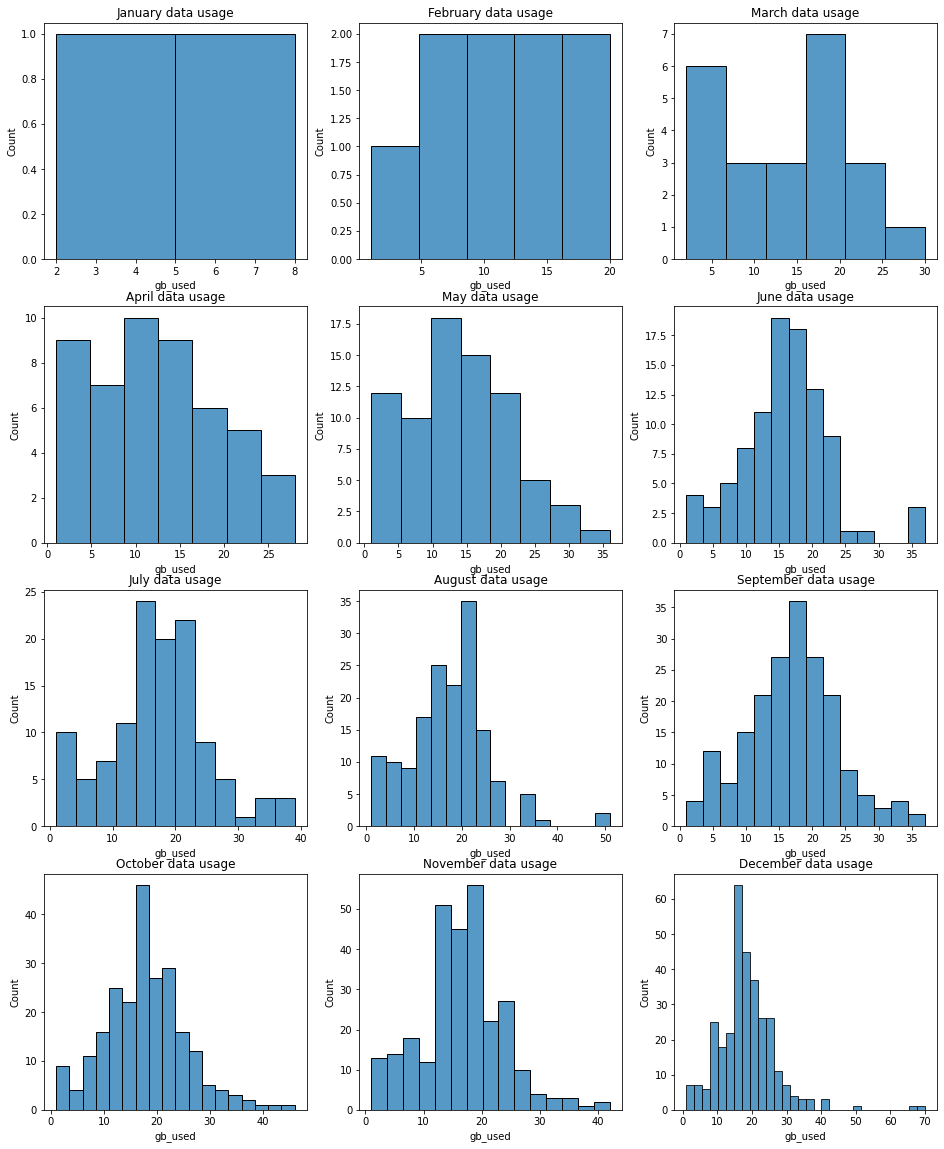

In [ ]:
# Distribusi penggunaan internet per bulan
plt.figure(figsize=(16, 20))

plt.subplot(4, 3, 1)
surf_1 = groupby_month('plan_used', 'surf', '2018-01', 'gb_used')
plt.title('January data usage')
sns.histplot(data = surf_1)

plt.subplot(4, 3, 2)
surf_2 = groupby_month('plan_used', 'surf', '2018-02', 'gb_used')
plt.title('February data usage')
sns.histplot(data = surf_2)

plt.subplot(4, 3, 3)
surf_3 = groupby_month('plan_used', 'surf', '2018-03', 'gb_used')
plt.title('March data usage')
sns.histplot(data = surf_3)

plt.subplot(4, 3, 4)
surf_4 = groupby_month('plan_used', 'surf', '2018-04', 'gb_used')
plt.title('April data usage')
sns.histplot(data = surf_4)

plt.subplot(4, 3, 5)
surf_5 = groupby_month('plan_used', 'surf', '2018-05', 'gb_used')
plt.title('May data usage')
sns.histplot(data = surf_5)

plt.subplot(4, 3, 6)
surf_6 = groupby_month('plan_used', 'surf', '2018-06', 'gb_used')
plt.title('June data usage')
sns.histplot(data = surf_6)

plt.subplot(4, 3, 7)
surf_7 = groupby_month('plan_used', 'surf', '2018-07', 'gb_used')
plt.title('July data usage')
sns.histplot(data = surf_7)

plt.subplot(4, 3, 8)
surf_8 = groupby_month('plan_used', 'surf', '2018-08', 'gb_used')
plt.title('August data usage')
sns.histplot(data = surf_8)

plt.subplot(4, 3, 9)
surf_9 = groupby_month('plan_used', 'surf', '2018-09', 'gb_used')
plt.title('September data usage')
sns.histplot(data = surf_9)

plt.subplot(4, 3, 10)
surf_10 = groupby_month('plan_used', 'surf', '2018-10', 'gb_used')
plt.title('October data usage')
sns.histplot(data = surf_10)

plt.subplot(4, 3, 11)
surf_11 = groupby_month('plan_used', 'surf', '2018-11', 'gb_used')
plt.title('November data usage')
sns.histplot(data = surf_11)

plt.subplot(4, 3, 12)
surf_12 = groupby_month('plan_used', 'surf', '2018-12', 'gb_used')
plt.title('December data usage')
sns.histplot(data = surf_12)

plt.show()

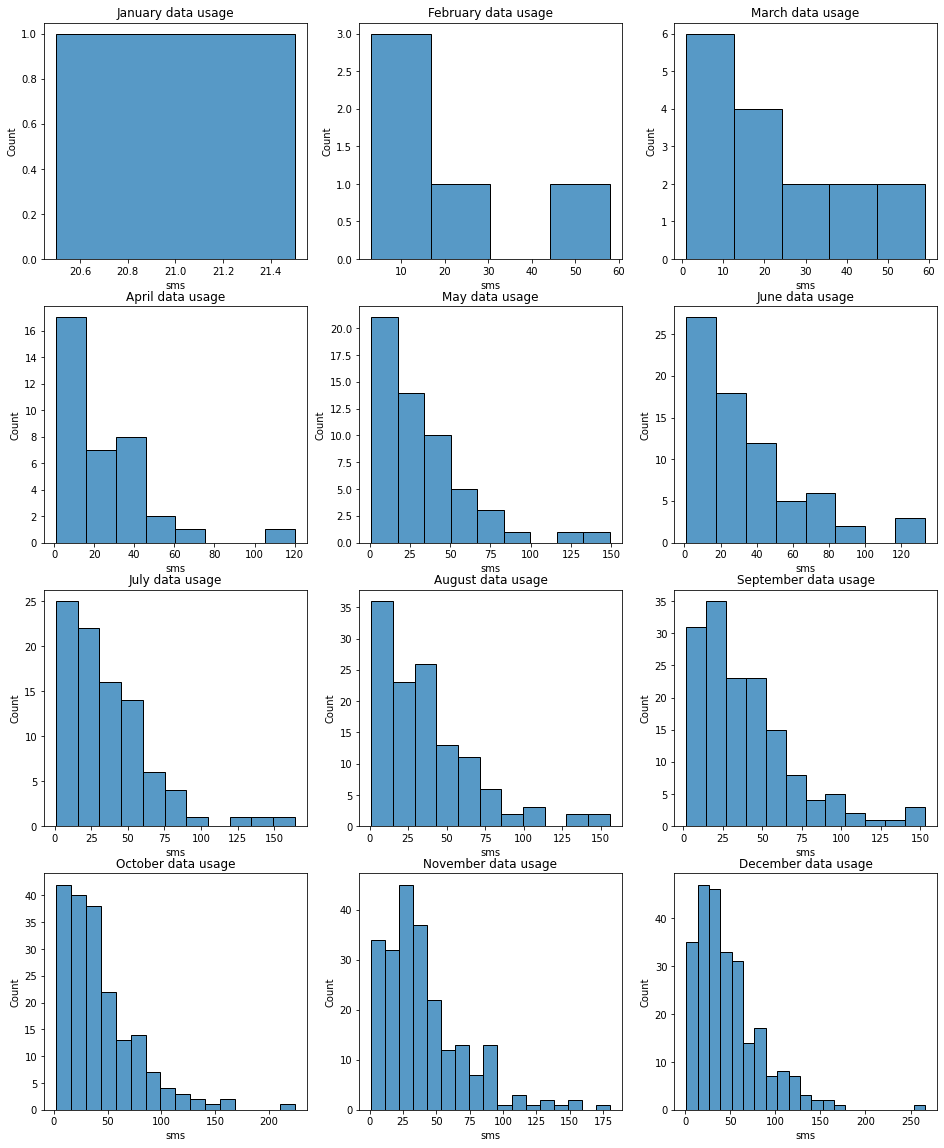

In [ ]:
# Distribusi pengiriman sms per bulan
plt.figure(figsize=(16, 20))

plt.subplot(4, 3, 1)
surf_1 = groupby_month('plan_used', 'surf', '2018-01', 'sms')
plt.title('January data usage')
sns.histplot(data = surf_1)

plt.subplot(4, 3, 2)
surf_2 = groupby_month('plan_used', 'surf', '2018-02', 'sms')
plt.title('February data usage')
sns.histplot(data = surf_2)

plt.subplot(4, 3, 3)
surf_3 = groupby_month('plan_used', 'surf', '2018-03', 'sms')
plt.title('March data usage')
sns.histplot(data = surf_3)

plt.subplot(4, 3, 4)
surf_4 = groupby_month('plan_used', 'surf', '2018-04', 'sms')
plt.title('April data usage')
sns.histplot(data = surf_4)

plt.subplot(4, 3, 5)
surf_5 = groupby_month('plan_used', 'surf', '2018-05', 'sms')
plt.title('May data usage')
sns.histplot(data = surf_5)

plt.subplot(4, 3, 6)
surf_6 = groupby_month('plan_used', 'surf', '2018-06', 'sms')
plt.title('June data usage')
sns.histplot(data = surf_6)

plt.subplot(4, 3, 7)
surf_7 = groupby_month('plan_used', 'surf', '2018-07', 'sms')
plt.title('July data usage')
sns.histplot(data = surf_7)

plt.subplot(4, 3, 8)
surf_8 = groupby_month('plan_used', 'surf', '2018-08', 'sms')
plt.title('August data usage')
sns.histplot(data = surf_8)

plt.subplot(4, 3, 9)
surf_9 = groupby_month('plan_used', 'surf', '2018-09', 'sms')
plt.title('September data usage')
sns.histplot(data = surf_9)

plt.subplot(4, 3, 10)
surf_10 = groupby_month('plan_used', 'surf', '2018-10', 'sms')
plt.title('October data usage')
sns.histplot(data = surf_10)

plt.subplot(4, 3, 11)
surf_11 = groupby_month('plan_used', 'surf', '2018-11', 'sms')
plt.title('November data usage')
sns.histplot(data = surf_11)

plt.subplot(4, 3, 12)
surf_12 = groupby_month('plan_used', 'surf', '2018-12', 'sms')
plt.title('December data usage')
sns.histplot(data = surf_12)

plt.show()

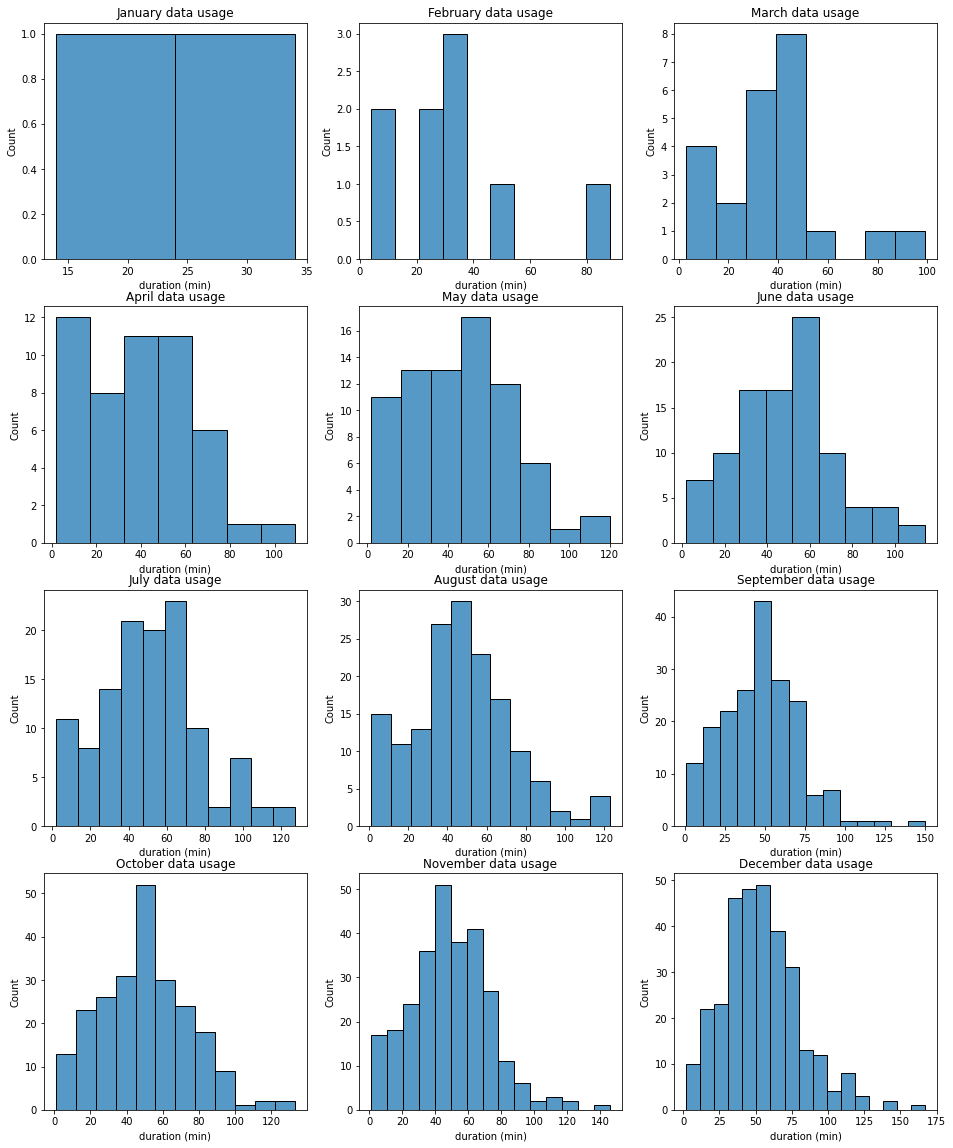

In [ ]:
# Distribusi durasi telefon per bulan
plt.figure(figsize=(16, 20))

plt.subplot(4, 3, 1)
surf_1 = groupby_month('plan_used', 'surf', '2018-01', 'duration (min)')
plt.title('January data usage')
sns.histplot(data = surf_1)

plt.subplot(4, 3, 2)
surf_2 = groupby_month('plan_used', 'surf', '2018-02', 'duration (min)')
plt.title('February data usage')
sns.histplot(data = surf_2)

plt.subplot(4, 3, 3)
surf_3 = groupby_month('plan_used', 'surf', '2018-03', 'duration (min)')
plt.title('March data usage')
sns.histplot(data = surf_3)

plt.subplot(4, 3, 4)
surf_4 = groupby_month('plan_used', 'surf', '2018-04', 'duration (min)')
plt.title('April data usage')
sns.histplot(data = surf_4)

plt.subplot(4, 3, 5)
surf_5 = groupby_month('plan_used', 'surf', '2018-05', 'duration (min)')
plt.title('May data usage')
sns.histplot(data = surf_5)

plt.subplot(4, 3, 6)
surf_6 = groupby_month('plan_used', 'surf', '2018-06', 'duration (min)')
plt.title('June data usage')
sns.histplot(data = surf_6)

plt.subplot(4, 3, 7)
surf_7 = groupby_month('plan_used', 'surf', '2018-07', 'duration (min)')
plt.title('July data usage')
sns.histplot(data = surf_7)

plt.subplot(4, 3, 8)
surf_8 = groupby_month('plan_used', 'surf', '2018-08', 'duration (min)')
plt.title('August data usage')
sns.histplot(data = surf_8)

plt.subplot(4, 3, 9)
surf_9 = groupby_month('plan_used', 'surf', '2018-09', 'duration (min)')
plt.title('September data usage')
sns.histplot(data = surf_9)

plt.subplot(4, 3, 10)
surf_10 = groupby_month('plan_used', 'surf', '2018-10', 'duration (min)')
plt.title('October data usage')
sns.histplot(data = surf_10)

plt.subplot(4, 3, 11)
surf_11 = groupby_month('plan_used', 'surf', '2018-11', 'duration (min)')
plt.title('November data usage')
sns.histplot(data = surf_11)

plt.subplot(4, 3, 12)
surf_12 = groupby_month('plan_used', 'surf', '2018-12', 'duration (min)')
plt.title('December data usage')
sns.histplot(data = surf_12)

plt.show()

**Insight**
1. Pada bulan januari - mei pengguna yang memilih plan 'surf' rata-rata tidak terkena biaya tambahan untuk penggunaan internet, biaya tambahan baru menjadi tren sejak bulan
juni desember (rata-rata terkena biaya tambahan 10-40$)

2. Penggunaan internet cenderung meningkat dari januari - juli dan baru stabil dikisaran 16-18gb pada bulan agustus hingga desember

3. Pengguna plan 'surf' rata-rata tidak pernah terkena biaya tambahan untuk penggunaan sms

4. Penggiriman sms pun cenderung meningkat pada tahun 2018

5. Pengguna plan 'surf' rata-rata tidak pernah terkena biaya tambahan untuk penggunaan durasi telefon dan durasi yang tersisa cenderung sangat banyak

6. Rata-rata pengguna plan 'surf hanya melakukan panggilan berurasi < 50 menit dalam sebulan

7. Dapat dilihat juga jumlah pengguna plan surf meningkat setiap bulannya yang menandakan bahwa minat pengguna pada plan 'surf pun semakin meningkat

In [ ]:
# Fungsi untuk menentukan nilai mean, varians dan standar deviasi dalam 1 tahun
def mean_var_std(data, column):
    df_mean = np.mean(data[column])
    df_median = np.median(data[column])
    df_var = np.var(data[column])
    df_std = np.sqrt(df_var)
    print('Nilai rata-rata kolom', column,'=', df_mean)
    print('Nilai median kolom', column, '=', df_median)
    print('Nilai varians kolom', column,'=', df_var)
    print('Nilai standar deviasi kolom', column,'=', df_std)

In [ ]:
# Nilai mean, varians dan standar deviasi kolom gb_used
mean_var_std(df_surf, 'gb_used')

Nilai rata-rata kolom gb_used = 10.935362802335279
Nilai median kolom gb_used = 12.0
Nilai varians kolom gb_used = 103.08881619447956
Nilai standar deviasi kolom gb_used = 10.153266282063106


In [ ]:
# Nilai mean, varians dan standar deviasi kolom duration (min)
mean_var_std(df_surf, 'duration (min)')

Nilai rata-rata kolom duration (min) = 31.641784820683903
Nilai median kolom duration (min) = 30.0
Nilai varians kolom duration (min) = 965.78035578022
Nilai standar deviasi kolom duration (min) = 31.077006866495687


In [ ]:
# Nilai mean, varians dan standar deviasi kolom gb_used
mean_var_std(df_surf, 'sms')

Nilai rata-rata kolom sms = 20.4395329441201
Nilai median kolom sms = 2.0
Nilai varians kolom sms = 957.7325822672635
Nilai standar deviasi kolom sms = 30.947254842186947


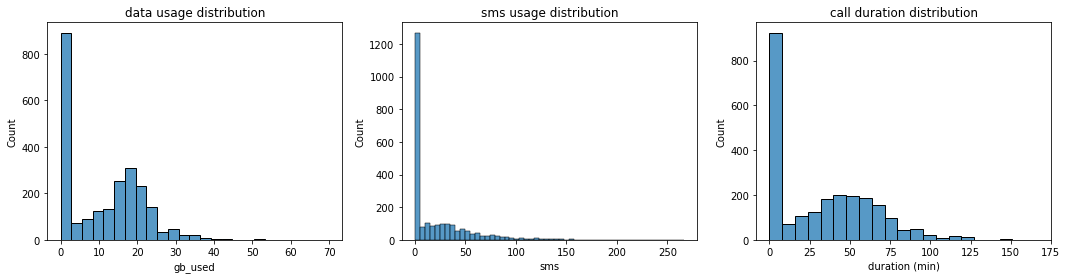

In [ ]:
# Membuat histogram untuk melihat distribusi data
plt.figure(figsize=(18,4))

plt.subplot(1, 3, 1)
gb_used = df_clean.loc[df_clean['plan_used'] == 'surf', 'gb_used']
plt.title('data usage distribution')
sns.histplot(data = gb_used)

plt.subplot(1, 3, 2)
sms = df_clean.loc[df_clean['plan_used'] == 'surf', 'sms']
plt.title('sms usage distribution')
sns.histplot(data = sms)

plt.subplot(1, 3, 3)
minutes = df_clean.loc[df_clean['plan_used'] == 'surf', 'duration (min)']
plt.title('call duration distribution')
sns.histplot(data = minutes)

plt.show()

Berdasarkan visualisasi data histogram diatas dapat dilihat bahwa outlier sangat mempengaruhi pembacaan hasil, sehingga perlu dilakukan pembersihan outlier untuk dapat melihat distribusi data yang lebih jelas.

In [ ]:
# Membuat fungsi untuk menangani outlier
def handling_outlier(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    temp_df = data[data[column] != 0]
    df = temp_df[(temp_df[column]> lower_whisker) & (temp_df[column]< upper_whisker)].reset_index(drop=True)
    return df

In [ ]:
# Variable baru tanpa outlier
surf_internet_no = handling_outlier(df_surf, 'gb_used')
surf_messages_no = handling_outlier(df_surf, 'sms')
surf_calls_no = handling_outlier(df_surf, 'duration (min)')

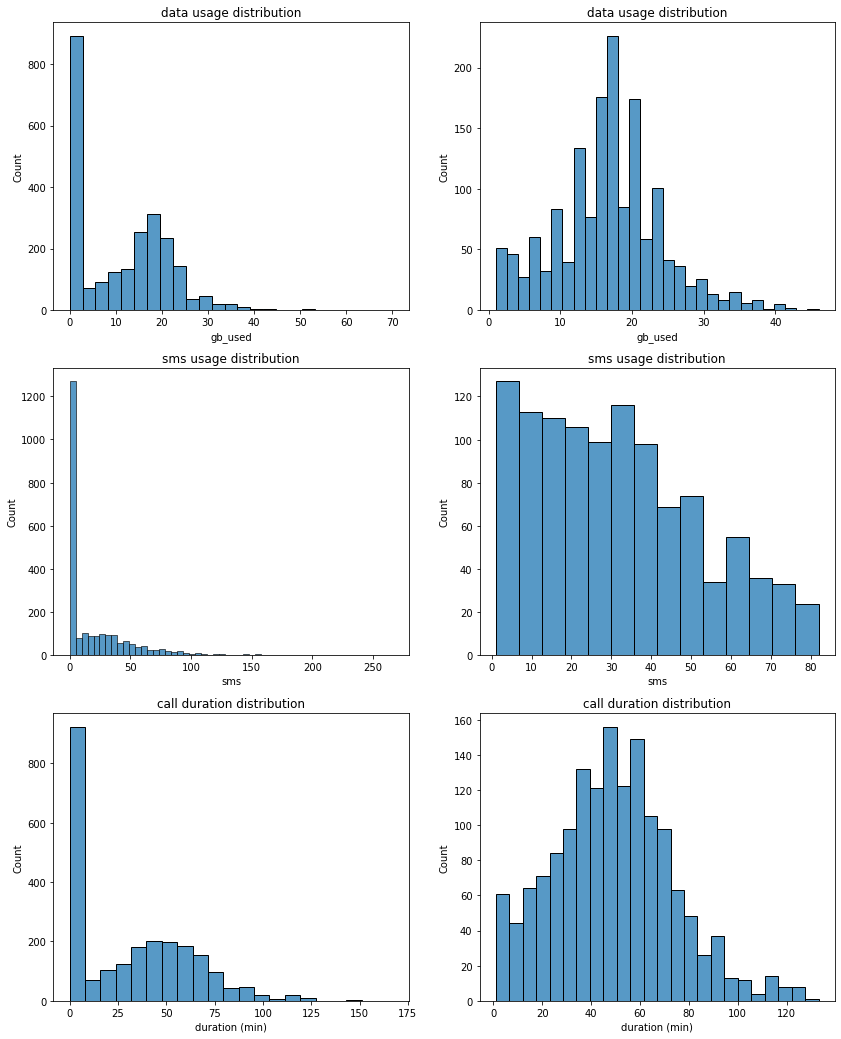

In [ ]:
# Membuat histogram untuk melihat distribusi data tanpa outlier
plt.figure(figsize=(14, 18))

plt.subplot(3, 2, 1)
gb_used = df_clean.loc[df_clean['plan_used'] == 'surf', 'gb_used']
plt.title('data usage distribution')
sns.histplot(data = gb_used)

plt.subplot(3, 2, 2)
gb_used_no = surf_internet_no.loc[surf_internet_no['plan_used'] == 'surf','gb_used']
plt.title('data usage distribution')
sns.histplot(data = gb_used_no)

plt.subplot(3, 2, 3)
sms = df_clean.loc[df_clean['plan_used'] == 'surf', 'sms']
plt.title('sms usage distribution')
sns.histplot(data = sms)

plt.subplot(3, 2, 4)
sms_no = surf_messages_no.loc[surf_messages_no['plan_used'] == 'surf', 'sms']
plt.title('sms usage distribution')
sns.histplot(data = sms_no)

plt.subplot(3, 2, 5)
minutes = df_clean.loc[df_clean['plan_used'] == 'surf', 'duration (min)']
plt.title('call duration distribution')
sns.histplot(data = minutes)

plt.subplot(3, 2, 6)
minutes_no = surf_calls_no.loc[surf_calls_no['plan_used'] == 'surf', 'duration (min)']
plt.title('call duration distribution')
sns.histplot(data = minutes_no)

plt.show()

**Melalui Visualisasi diatas dapat dilihat pada kolom sms usage distribution tidak terlalu terlihat distribusinya, sehingga mungkin dapat perlu dipertimbangkan visualisasi tetap dengan menggunakan outlier dan drop nilai nolnya**

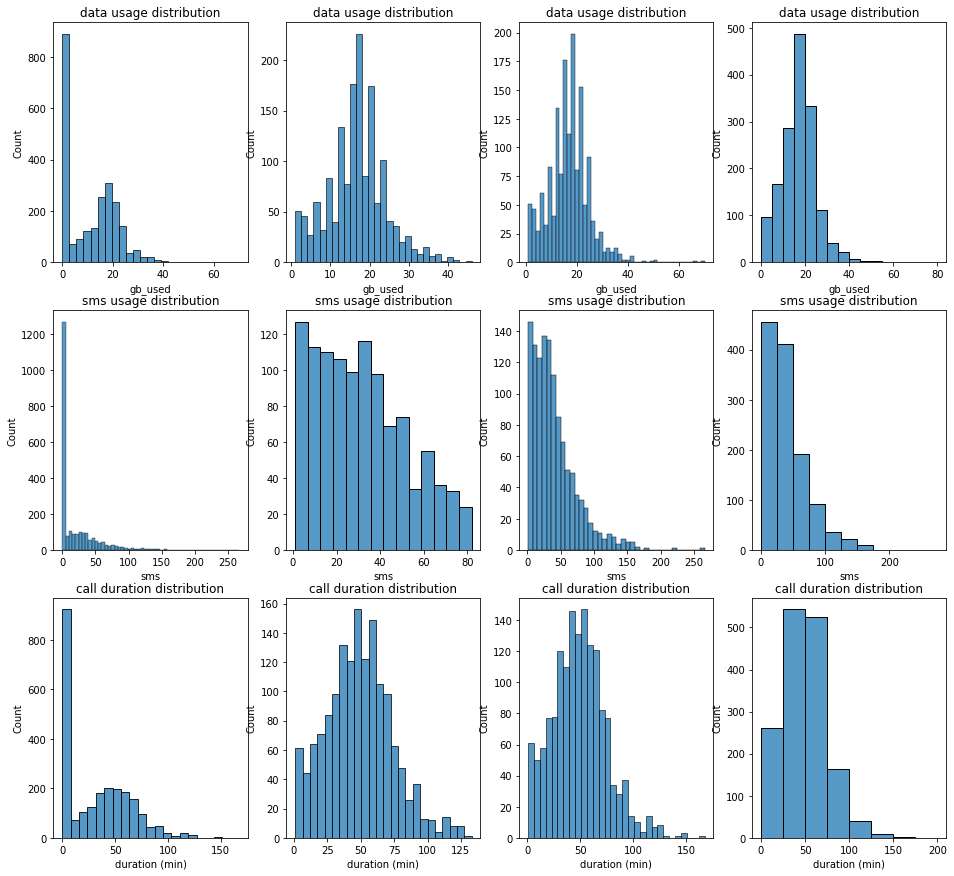

In [ ]:
# Membuat histogram untuk melihat distribusi data tanpa nilai nol
plt.figure(figsize=(16, 15))

plt.subplot(3, 4, 1)
gb_used = df_clean.loc[df_clean['plan_used'] == 'surf', 'gb_used']
plt.title('data usage distribution')
sns.histplot(data = gb_used)

plt.subplot(3, 4, 2)
gb_used_no = surf_internet_no.loc[surf_internet_no['plan_used'] == 'surf','gb_used']
plt.title('data usage distribution')
sns.histplot(data = gb_used_no)

plt.subplot(3, 4, 3)
gb = df_clean.loc[(df_clean['plan_used'] == 'surf') &
                  (df_clean['gb_used'] != 0), 'gb_used']
plt.title('data usage distribution')
sns.histplot(data = gb)

plt.subplot(3, 4, 4)
gb_frq = df_clean.loc[(df_clean['plan_used'] == 'surf') &
                  (df_clean['gb_used'] != 0), 'gb_used']
plt.title('data usage distribution')
sns.histplot(data =gb_frq, bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

plt.subplot(3, 4, 5)
sms = df_clean.loc[df_clean['plan_used'] == 'surf', 'sms']
plt.title('sms usage distribution')
sns.histplot(data = sms)

plt.subplot(3, 4, 6)
sms_no = surf_messages_no.loc[surf_messages_no['plan_used'] == 'surf', 'sms']
plt.title('sms usage distribution')
sns.histplot(data = sms_no)

plt.subplot(3, 4, 7)
sms = df_clean.loc[(df_clean['plan_used'] == 'surf') &
                   (df_clean['sms'] != 0), 'sms']
plt.title('sms usage distribution')
sns.histplot(data = sms)

plt.subplot(3, 4, 8)
sms_frq = df_clean.loc[(df_clean['plan_used'] == 'surf') &
                   (df_clean['sms'] != 0), 'sms']
plt.title('sms usage distribution')
sns.histplot(data = sms_frq, bins=[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275])

plt.subplot(3, 4, 9)
minutes = df_clean.loc[df_clean['plan_used'] == 'surf', 'duration (min)']
plt.title('call duration distribution')
sns.histplot(data = minutes)

plt.subplot(3, 4, 10)
minutes_no = surf_calls_no.loc[surf_calls_no['plan_used'] == 'surf', 'duration (min)']
plt.title('call duration distribution')
sns.histplot(data = minutes_no)

plt.subplot(3, 4, 11)
minutes = df_clean.loc[(df_clean['plan_used'] == 'surf') &
                       (df_clean['duration (min)'] != 0), 'duration (min)']
plt.title('call duration distribution')
sns.histplot(data = minutes)

plt.subplot(3, 4, 12)
minutes_frq = df_clean.loc[(df_clean['plan_used'] == 'surf') &
                       (df_clean['duration (min)'] != 0), 'duration (min)']
plt.title('call duration distribution')
sns.histplot(data = minutes_frq, bins=[0, 25, 50, 75, 100, 125, 150, 175, 200])

plt.show()

In [ ]:
# Membuat variabel baru tanpa nilai nol untuk melihat distribusinya
surf_gb = df_surf.loc[(df_surf['gb_used'] != 0)]
surf_sms = df_surf.loc[(df_surf['sms'] != 0)]
surf_calls = df_surf.loc[(df_surf['duration (min)'] != 0)]

In [ ]:
# Nilai mean, varians dan standar deviasi kolom gb_used
mean_var_std(surf_gb, 'gb_used')

Nilai rata-rata kolom gb_used = 16.831193838254173
Nilai median kolom gb_used = 17.0
Nilai varians kolom gb_used = 59.435560962426734
Nilai standar deviasi kolom gb_used = 7.709446216326224


In [ ]:
# Nilai mean, varians dan standar deviasi kolom duration (min)
mean_var_std(surf_calls, 'duration (min)')

Nilai rata-rata kolom duration (min) = 49.14313471502591
Nilai median kolom duration (min) = 48.0
Nilai varians kolom duration (min) = 639.8907818834062
Nilai standar deviasi kolom duration (min) = 25.296062576681894


In [ ]:
# Nilai mean, varians dan standar deviasi kolom gb_used
mean_var_std(surf_sms, 'sms')

Nilai rata-rata kolom sms = 40.10965630114566
Nilai median kolom sms = 32.0
Nilai varians kolom sms = 1090.4511506183685
Nilai standar deviasi kolom sms = 33.02197981070137


In [ ]:
# Mencari kemungkinan pengguna terkena biaya tambahan dari pengiriman sms
p_extra_sms = surf_sms['sms'].quantile(0.73)
p_extra_sms

51.0

**Insight:**
1. Berdasarkan visualisasi dapat dilihat bahwa sebaran data penggunaan internet, sms dan telefon membentuk distribusi miring kanan
2. Tetapi berdasarkan pengecekan nilai median dan mean ditemukan bahwa sebaran data penggunaan internet memiliki nilai mean yang lebih kecil dari pada median sehingga distribusinya dapat dikatakan miring kiri 
3. Visualisasi tersebut menjelaskan bahwa pada tahun 2018 rata-rata pengguna yang memilih plan surf terkena biaya tambahan internet dengan kemungkinan sebesar 50% untuk terkena biaya tambahan sebesar $20 per bulan
4. Rata-rata pengguna tidak terkena biaya tambahan untuk penggunaan telfon maupun sms.
5. Penggunaan waktu telfon tidak pernah melebihi batas yang include dalam plan surf
6. Terdapat 27% kemungkinan pengguna terkena biaya tambahan dari kelebihan mengirimkan sms

### Analisa karakteristik pengguna plan 'Ultimate'<a id='ultimate_plan_analysis'></a>

In [ ]:
#filter pengguna yang menggunakan plan ultimate
df_ultimate = df_clean[df_clean['plan_used'] == 'ultimate']

In [ ]:
# Membuat pivot table untuk melihat karakteristik pengguna plan ultimate per bulan
u_gb_wo_zero = df_ultimate[df_ultimate['gb_used'] != 0]
u_sms_wo_zero = df_ultimate[df_ultimate['sms'] != 0]
u_calls_wo_zero = df_ultimate[df_ultimate['duration (min)'] != 0]

In [ ]:
# melihat nilai mean, varian dan standard deviasi penggunaan internet, pengiriman sms dan durasi telefon
u_gb_grouped = u_gb_wo_zero.pivot_table(index = 'month', 
                                    values = ['gb_used'], 
                                    aggfunc = (len, sum, np.mean, np.median, np.var, np.std)).reset_index()

u_sms_grouped = u_sms_wo_zero.pivot_table(index = 'month', 
                                    values = ['sms'], 
                                    aggfunc = (len, sum, np.mean, np.median, np.var, np.std)).reset_index()

u_calls_grouped = u_calls_wo_zero.pivot_table(index = 'month', 
                                    values = ['duration (min)'], 
                                    aggfunc = (len, sum, np.mean, np.median, np.var, np.std)).reset_index()

In [ ]:
# Menggabungkan tabel
u_grouped_merge = u_gb_grouped.merge(u_sms_grouped, how = 'left')
u_grouped_merge = u_grouped_merge.merge(u_calls_grouped, how = 'left')
u_grouped_merge

month gb_used                                                     sms  \
                len       mean median        std     sum         var    len   
0   2018-01     4.0   7.250000    8.0   3.862210    29.0   14.916667    3.0   
1   2018-02     7.0  17.285714   20.0   6.156684   121.0   37.904762    6.0   
2   2018-03    12.0  18.416667   21.0  11.774073   221.0  138.628788    7.0   
3   2018-04    21.0  16.333333   16.0   9.264628   343.0   85.833333   16.0   
4   2018-05    29.0  16.862069   17.0   7.361697   489.0   54.194581   21.0   
5   2018-06    47.0  15.425532   15.0   8.298100   725.0   68.858464   38.0   
6   2018-07    59.0  16.491525   15.0   8.015874   973.0   64.254237   47.0   
7   2018-08    71.0  17.845070   18.0   7.618864  1267.0   58.047082   57.0   
8   2018-09    86.0  17.011628   16.5   6.874495  1463.0   47.258687   71.0   
9   2018-10   105.0  17.885714   17.0   7.216853  1878.0   52.082967   89.0   
10  2018-11   127.0  17.118110   17.0   7.375005  2174.0   54.390701  103.0   
11  2018-12   151.0  18.397351   17.0   7.670793  2778.0   58.841060  126.0   

                                                     duration (min)  \
         mean median        std     sum          var            len   
0   20.666667   23.0  17.616280    62.0   310.333333            4.0   
1   25.166667   19.0  21.572359   151.0   465.366667            6.0   
2   34.714286   26.0  24.777102   243.0   613.904762           12.0   
3   28.937500   20.5  22.646468   463.0   512.862500           21.0   
4   44.333333   35.0  35.311943   931.0  1246.933333           29.0   
5   36.289474   31.0  28.411939  1379.0   807.238265           45.0   
6   41.212766   35.0  29.293074  1937.0   858.084181           59.0   
7   47.929825   42.0  32.161901  2732.0  1034.387845           71.0   
8   45.901408   47.0  30.056212  3259.0   903.375855           86.0   
9   46.977528   40.0  33.151847  4181.0  1099.044944          105.0   
10  47.601942   41.0  33.019703  4903.0  1090.300781          125.0   
11  53.936508   48.5  37.064861  6796.0  1373.803937          149.0   

                                                     
         mean median        std     sum         var  
0   21.250000   25.0  14.545904    85.0  211.583333  
1   55.166667   58.0  26.708925   331.0  713.366667  
2   36.583333   28.5  31.242332   439.0  976.083333  
3   39.047619   40.0  21.898576   820.0  479.547619  
4   45.965517   44.0  23.798984  1333.0  566.391626  
5   44.022222   46.0  21.473545  1981.0  461.113131  
6   47.355932   48.0  30.364318  2794.0  921.991818  
7   48.000000   47.0  26.083383  3408.0  680.342857  
8   48.930233   48.5  25.644993  4208.0  657.665663  
9   51.504762   53.0  26.076855  5408.0  680.002381  
10  50.752000   49.0  26.368559  6344.0  695.300903  
11  52.838926   51.0  27.388858  7873.0  750.149556

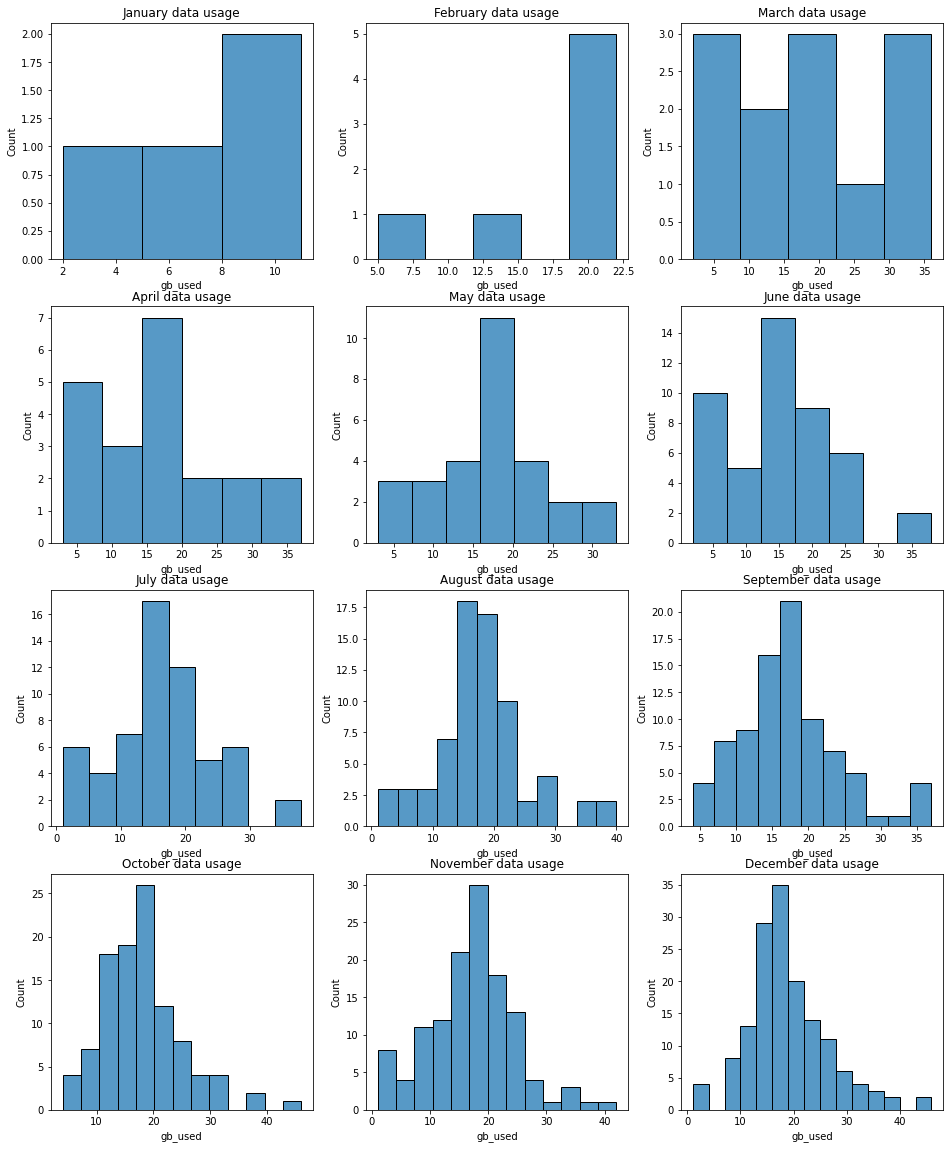

In [ ]:
# Distribusi penggunaan internet per bulan
plt.figure(figsize=(16, 20))

plt.subplot(4, 3, 1)
surf_1 = groupby_month('plan_used', 'ultimate', '2018-01', 'gb_used')
plt.title('January data usage')
sns.histplot(data = surf_1)

plt.subplot(4, 3, 2)
surf_2 = groupby_month('plan_used', 'ultimate', '2018-02', 'gb_used')
plt.title('February data usage')
sns.histplot(data = surf_2)

plt.subplot(4, 3, 3)
surf_3 = groupby_month('plan_used', 'ultimate', '2018-03', 'gb_used')
plt.title('March data usage')
sns.histplot(data = surf_3)

plt.subplot(4, 3, 4)
surf_4 = groupby_month('plan_used', 'ultimate', '2018-04', 'gb_used')
plt.title('April data usage')
sns.histplot(data = surf_4)

plt.subplot(4, 3, 5)
surf_5 = groupby_month('plan_used', 'ultimate', '2018-05', 'gb_used')
plt.title('May data usage')
sns.histplot(data = surf_5)

plt.subplot(4, 3, 6)
surf_6 = groupby_month('plan_used', 'ultimate', '2018-06', 'gb_used')
plt.title('June data usage')
sns.histplot(data = surf_6)

plt.subplot(4, 3, 7)
surf_7 = groupby_month('plan_used', 'ultimate', '2018-07', 'gb_used')
plt.title('July data usage')
sns.histplot(data = surf_7)

plt.subplot(4, 3, 8)
surf_8 = groupby_month('plan_used', 'ultimate', '2018-08', 'gb_used')
plt.title('August data usage')
sns.histplot(data = surf_8)

plt.subplot(4, 3, 9)
surf_9 = groupby_month('plan_used', 'ultimate', '2018-09', 'gb_used')
plt.title('September data usage')
sns.histplot(data = surf_9)

plt.subplot(4, 3, 10)
surf_10 = groupby_month('plan_used', 'ultimate', '2018-10', 'gb_used')
plt.title('October data usage')
sns.histplot(data = surf_10)

plt.subplot(4, 3, 11)
surf_11 = groupby_month('plan_used', 'ultimate', '2018-11', 'gb_used')
plt.title('November data usage')
sns.histplot(data = surf_11)

plt.subplot(4, 3, 12)
surf_12 = groupby_month('plan_used', 'ultimate', '2018-12', 'gb_used')
plt.title('December data usage')
sns.histplot(data = surf_12)

plt.show()

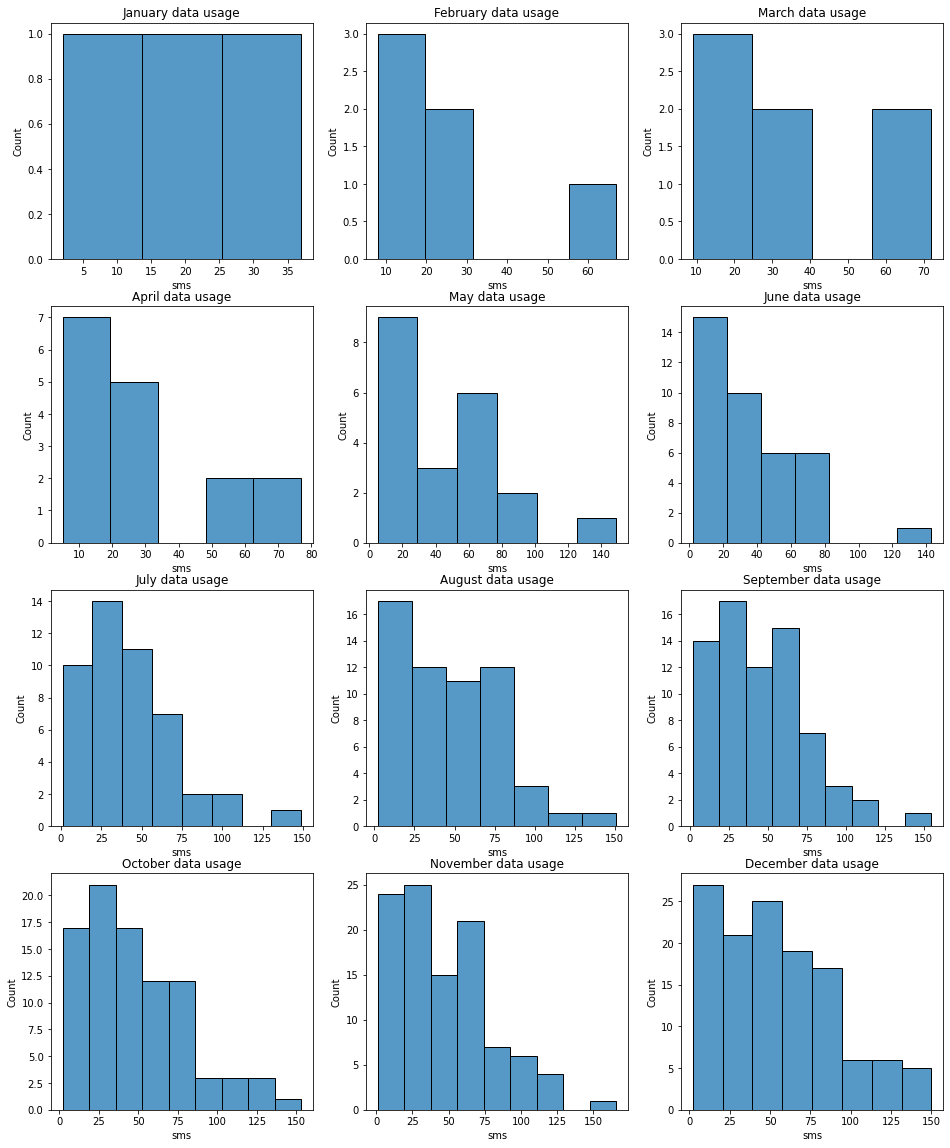

In [ ]:
plt.figure(figsize=(16, 20))

plt.subplot(4, 3, 1)
surf_1 = groupby_month('plan_used', 'ultimate', '2018-01', 'sms')
plt.title('January data usage')
sns.histplot(data = surf_1)

plt.subplot(4, 3, 2)
surf_2 = groupby_month('plan_used', 'ultimate', '2018-02', 'sms')
plt.title('February data usage')
sns.histplot(data = surf_2)

plt.subplot(4, 3, 3)
surf_3 = groupby_month('plan_used', 'ultimate', '2018-03', 'sms')
plt.title('March data usage')
sns.histplot(data = surf_3)

plt.subplot(4, 3, 4)
surf_4 = groupby_month('plan_used', 'ultimate', '2018-04', 'sms')
plt.title('April data usage')
sns.histplot(data = surf_4)

plt.subplot(4, 3, 5)
surf_5 = groupby_month('plan_used', 'ultimate', '2018-05', 'sms')
plt.title('May data usage')
sns.histplot(data = surf_5)

plt.subplot(4, 3, 6)
surf_6 = groupby_month('plan_used', 'ultimate', '2018-06', 'sms')
plt.title('June data usage')
sns.histplot(data = surf_6)

plt.subplot(4, 3, 7)
surf_7 = groupby_month('plan_used', 'ultimate', '2018-07', 'sms')
plt.title('July data usage')
sns.histplot(data = surf_7)

plt.subplot(4, 3, 8)
surf_8 = groupby_month('plan_used', 'ultimate', '2018-08', 'sms')
plt.title('August data usage')
sns.histplot(data = surf_8)

plt.subplot(4, 3, 9)
surf_9 = groupby_month('plan_used', 'ultimate', '2018-09', 'sms')
plt.title('September data usage')
sns.histplot(data = surf_9)

plt.subplot(4, 3, 10)
surf_10 = groupby_month('plan_used', 'ultimate', '2018-10', 'sms')
plt.title('October data usage')
sns.histplot(data = surf_10)

plt.subplot(4, 3, 11)
surf_11 = groupby_month('plan_used', 'ultimate', '2018-11', 'sms')
plt.title('November data usage')
sns.histplot(data = surf_11)

plt.subplot(4, 3, 12)
surf_12 = groupby_month('plan_used', 'ultimate', '2018-12', 'sms')
plt.title('December data usage')
sns.histplot(data = surf_12)

plt.show()

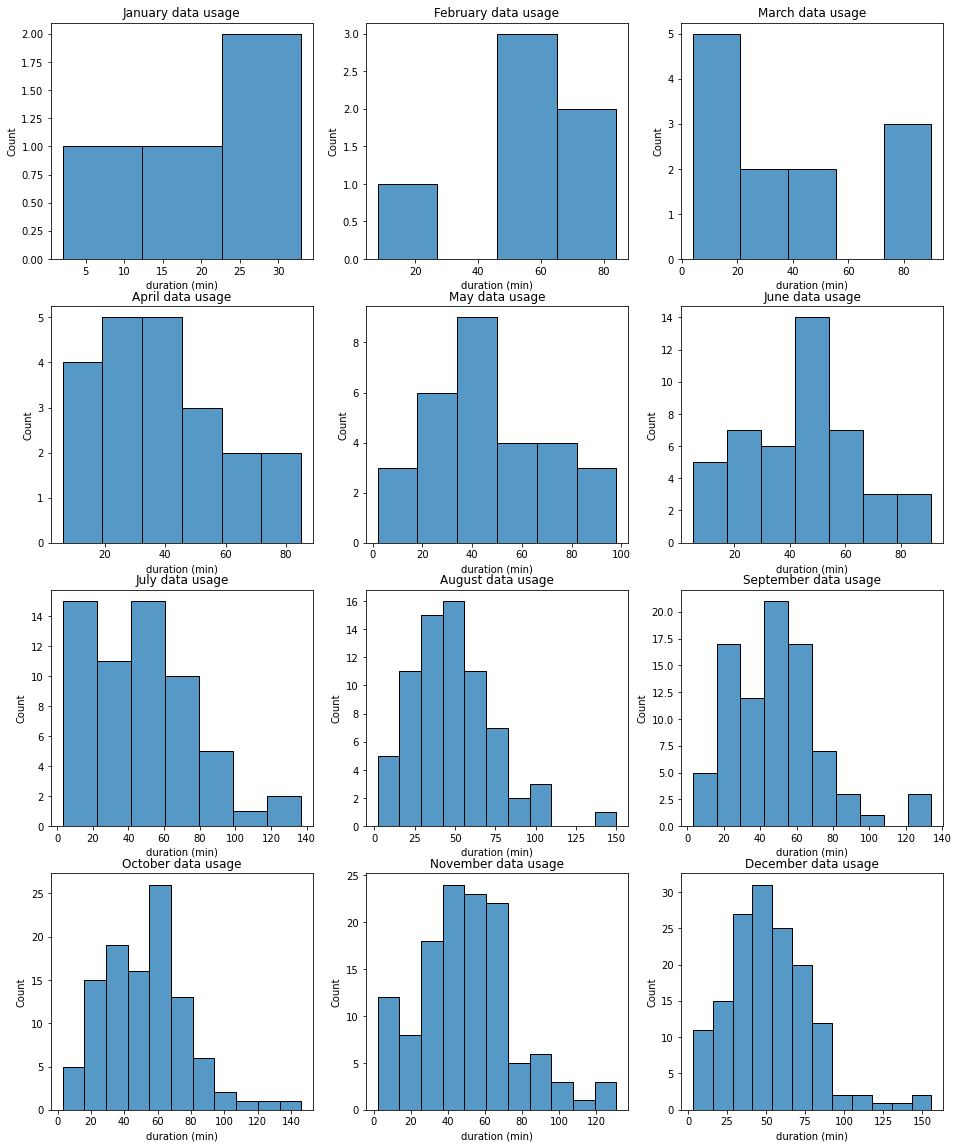

In [ ]:
# Distribusi durasi telefon per bulan
plt.figure(figsize=(16, 20))

plt.subplot(4, 3, 1)
surf_1 = groupby_month('plan_used', 'ultimate', '2018-01', 'duration (min)')
plt.title('January data usage')
sns.histplot(data = surf_1)

plt.subplot(4, 3, 2)
surf_2 = groupby_month('plan_used', 'ultimate', '2018-02', 'duration (min)')
plt.title('February data usage')
sns.histplot(data = surf_2)

plt.subplot(4, 3, 3)
surf_3 = groupby_month('plan_used', 'ultimate', '2018-03', 'duration (min)')
plt.title('March data usage')
sns.histplot(data = surf_3)

plt.subplot(4, 3, 4)
surf_4 = groupby_month('plan_used', 'ultimate', '2018-04', 'duration (min)')
plt.title('April data usage')
sns.histplot(data = surf_4)

plt.subplot(4, 3, 5)
surf_5 = groupby_month('plan_used', 'ultimate', '2018-05', 'duration (min)')
plt.title('May data usage')
sns.histplot(data = surf_5)

plt.subplot(4, 3, 6)
surf_6 = groupby_month('plan_used', 'ultimate', '2018-06', 'duration (min)')
plt.title('June data usage')
sns.histplot(data = surf_6)

plt.subplot(4, 3, 7)
surf_7 = groupby_month('plan_used', 'ultimate', '2018-07', 'duration (min)')
plt.title('July data usage')
sns.histplot(data = surf_7)

plt.subplot(4, 3, 8)
surf_8 = groupby_month('plan_used', 'ultimate', '2018-08', 'duration (min)')
plt.title('August data usage')
sns.histplot(data = surf_8)

plt.subplot(4, 3, 9)
surf_9 = groupby_month('plan_used', 'ultimate', '2018-09', 'duration (min)')
plt.title('September data usage')
sns.histplot(data = surf_9)

plt.subplot(4, 3, 10)
surf_10 = groupby_month('plan_used', 'ultimate', '2018-10', 'duration (min)')
plt.title('October data usage')
sns.histplot(data = surf_10)

plt.subplot(4, 3, 11)
surf_11 = groupby_month('plan_used', 'ultimate', '2018-11', 'duration (min)')
plt.title('November data usage')
sns.histplot(data = surf_11)

plt.subplot(4, 3, 12)
surf_12 = groupby_month('plan_used', 'ultimate', '2018-12', 'duration (min)')
plt.title('December data usage')
sns.histplot(data = surf_12)

plt.show()

**Insight**
1. Pengguna yang memilih plan 'ultimate' rata-rata tidak terkena biaya tambahan untuk penggunaan internet dan sisa internet yang tidak digunakan cenderung sangat banyak

2. Penggunaan internet cenderung stabil dari bulan februari hingga desember dengan kisaran diantara 15-18gb

3. Pengguna plan 'ultimate' rata-rata tidak pernah terkena biaya tambahan untuk penggunaan sms 

4. Penggiriman sms pun cenderung meningkat pada tahun 2018, meskipun sisa sms yang tidak digunakan cenderung sangat banyak

5. Pengguna plan 'ultimate' rata-rata tidak pernah terkena biaya tambahan untuk penggunaan durasi telefon dan durasi yang tersisa cenderung sangat banyak

6. Rata-rata pengguna plan 'ultimate hanya melakukan panggilan berurasi < 50 menit dalam sebulan

## Menguji Hipotesis <a id='hypotesis_testing'></a>

### Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda <a id='surf_ultimate_revenue'></a>

Hipotesis nol umumnya adalah hipotesis yang menyatakan sesuatu yang akan diuji adalah sama, sehingga nilai 

H0: Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf **sama**

H1: Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf **tidak sama**

Kriteria pengujian hipoetesis yang saya gunakan adalah pengujian rata-rata untuk 2 populasi karena samplenya merupakan 2 populasi yang berbeda 

In [ ]:
# Melihat perbedaan nilai variasi pendapatan antara plan ultimate dan surf
np.var(df_surf['revenue']), np.var(df_ultimate['revenue'])

(2291.4799533504947, 83.78596595737363)

In [ ]:
# Melakukan pengujian hipotesis
alpha = 0.05

results_usr = st.ttest_ind(df_surf['revenue'], df_ultimate['revenue'], equal_var = False)

print('p-value:', results_usr.pvalue)

if (results_usr.pvalue < alpha):
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 8.421768951752138e-130
Kita menolak hipotesis nol


### Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain. <a id='ny_nj_revenue'></a>

Hipotesis nol umumnya adalah hipotesis yang menyatakan sesuatu yang akan diuji adalah sama, sehingga nilai 

H0: Rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain adalah **sama**

H1: Rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain adalah **tidak sama**

Kriteria pengujian hipoetesis yang saya gunakan adalah pengujian rata-rata untuk 2 populasi karena samplenya merupakan 2 populasi yang berbeda 

In [ ]:
# #filter pengguna berdasarkan daerah
df_ny_nj = df_clean[df_clean['is_ny_nj'] == 'NY-NJ']
df_others = df_clean[df_clean['is_ny_nj'] == 'others']

In [ ]:
# Melihat perbedaan nilai variasi pendapatan antara daerah ny-nj atau bukan
np.var(df_ny_nj['revenue']), np.var(df_others['revenue'])

(1514.9094869991204, 1769.6640225970048)

In [ ]:
# Melakukan pengujian hipotesis
alpha = 0.05

results_usr = st.ttest_ind(df_ny_nj['revenue'], df_others['revenue'], equal_var = False)

print('p-value:', results_usr.pvalue)

if (results_usr.pvalue < alpha):
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 0.004157849388059232
Kita menolak hipotesis nol


## Kesimpulan <a id='summary'></a>

Berdasarkan pengamatan didapatkan diketahui hipotesis data benar bahwa terdapat perbedaan diantara jumlah pendapatan antara plan surf dan plan ultimate, serta perbedaan antara jumlah pendapatan dari pengguna yang berasal dari NY-NJ dan daerah lainnya. 

Berdasarkan visualisasi dapat dilihat bahwa jumlah pengguna paket surf cenderung meningkat tiap bulannya, dapat disimpulkan bahwa sepertinya paket surf memang cukup murah dan lebih sesuai dengan kebutuhan pengguna pada daerah NY-NJ dan daerah lainnya.

Jika jumlah pendapatan dihitung berdasarkan biaya tambahan yang dikenakan apabila terdapat kelebihan penggunaan paket surf memang mendatangkan pendapatan yang lebih tinggi pada seluruh daerah, tetapi jika dihitung berdasarkan total pendapatan paket ultimate - la yang mendapatkan pendapatan yang lebih tinggi.

Kesimpulannya untuk anggaran iklan lebih baik untuk diset pada paket ultimate karena **paket ultimate mendatangkan pendapatan lebih banyak dari pada paket surf**

Based on the analysis, the marketing team can consider the following recommendations:

The marketing department focuses their advertising budget on the Ultimate plan. Although the Surf plan has a lower cost and is more popular in NY-NJ and other areas, the revenue from the Ultimate plan is higher when calculated based on total revenue. Additionally, the number of Surf plan users is already increasing every month, suggesting that it does not require as much advertising attention as the Ultimate plan. The marketing department can also consider offering promotions or incentives for customers to switch to the Ultimate plan to further increase revenue.
